# Introducción

En este proyecto vamos a estudiar qué afecta a las notas de los estudiantes. Saber esto es muy importante porque puede ayudarnos a mejorar la educación para todos, especialmente para quienes tienen más dificultades.
El problema que queremos resolver

¿Qué factores influyen más en las notas de los estudiantes y cómo se relacionan entre sí? Esta pregunta es clave para crear mejores políticas educativas que ayuden a todos los estudiantes.
Lo que pensamos antes de analizar los datos

## Antes de mirar los datos, teníamos estas ideas:

    Idea sobre el nivel económico: Creemos que el nivel económico de los estudiantes (medido por el tipo de comida que reciben) será lo que más afecta a sus notas.
    Idea sobre la preparación: Los estudiantes que hacen cursos de preparación sacarán mejores notas, sin importar otros factores.
    Idea sobre la educación de los padres: Si los padres tienen más estudios, sus hijos tendrán mejores notas.
    Idea sobre el género: Habrá diferencias entre chicos y chicas: las chicas serán mejores en lectura y escritura, y los chicos en matemáticas.
    Idea sobre grupos étnicos: Habrá diferencias en las notas entre distintos grupos étnicos, pero estas diferencias serán menores si tenemos en cuenta el nivel económico.

## Nuestros datos

Usaremos el archivo "StudentsPerformance.csv", que tiene información sobre:

    Género
    Grupo étnico
    Nivel de estudios de los padres
    Tipo de comida (que nos dice algo sobre su nivel económico)
    Si han hecho un curso de preparación
    Notas en matemáticas, lectura y escritura

Con estos datos podremos ver qué factores afectan más a las notas y comprobar si nuestras ideas iniciales eran correctas.


## Import Required Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Explanation:

    pandas for data manipulation.

    numpy for numerical operations.

    seaborn and matplotlib.pyplot for plotting.

## Carga y limpieza de Datos

Primero, cargamos el dataset y realizamos una inspección inicial para asegurar su calidad.

In [20]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Basic Dataset Info

In [21]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Check for Missing Values

In [22]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Statistical Summary

In [23]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Análisis de la Distribución por Género:

Gender counts:
gender
female    518
male      482
Name: count, dtype: int64

Gender percentages:
gender
female    51.8
male      48.2
Name: proportion, dtype: float64 %


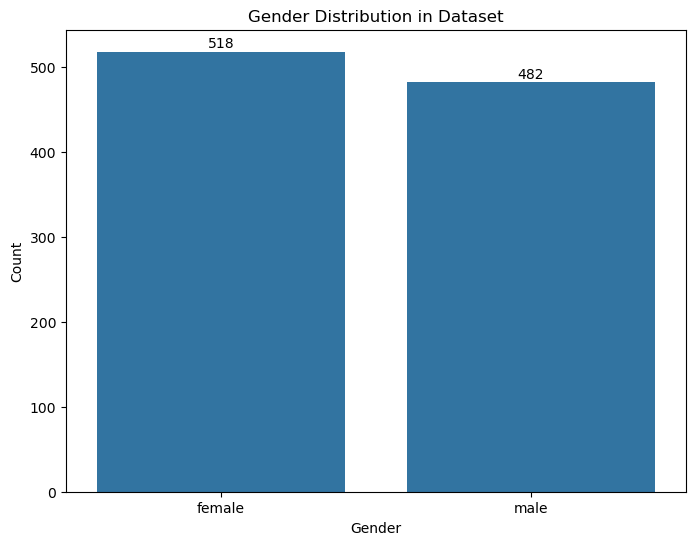

In [24]:
# Count the number of females and males
gender_counts = df['gender'].value_counts()
print("Gender counts:")
print(gender_counts)

# Calculate percentages
gender_percentage = df['gender'].value_counts(normalize=True) * 100
print("\nGender percentages:")
print(gender_percentage.round(2), "%")

# Visualize gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution in Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add count labels on top of the bars
for i, count in enumerate(gender_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()

El conjunto de datos está bien equilibrado entre géneros, con una ligera mayoría de mujeres. Esta representación casi igual significa:

Las comparaciones por género en este conjunto de datos serán fiables
La pequeña diferencia en el número de estudiantes no debería afectar significativamente al análisis
Tenemos suficientes datos de ambos grupos para sacar conclusiones significativas

Esta comprobación del equilibrio es un primer paso importante antes de analizar las diferencias de rendimiento, ya que confirma que tenemos una representación adecuada de ambos géneros en el conjunto de datos.

## Calculate average score


In [ ]:

df['average score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3


## Análisis de las Notas por Asignatura y Género

Comparamos las puntuaciones entre géneros con boxplots.

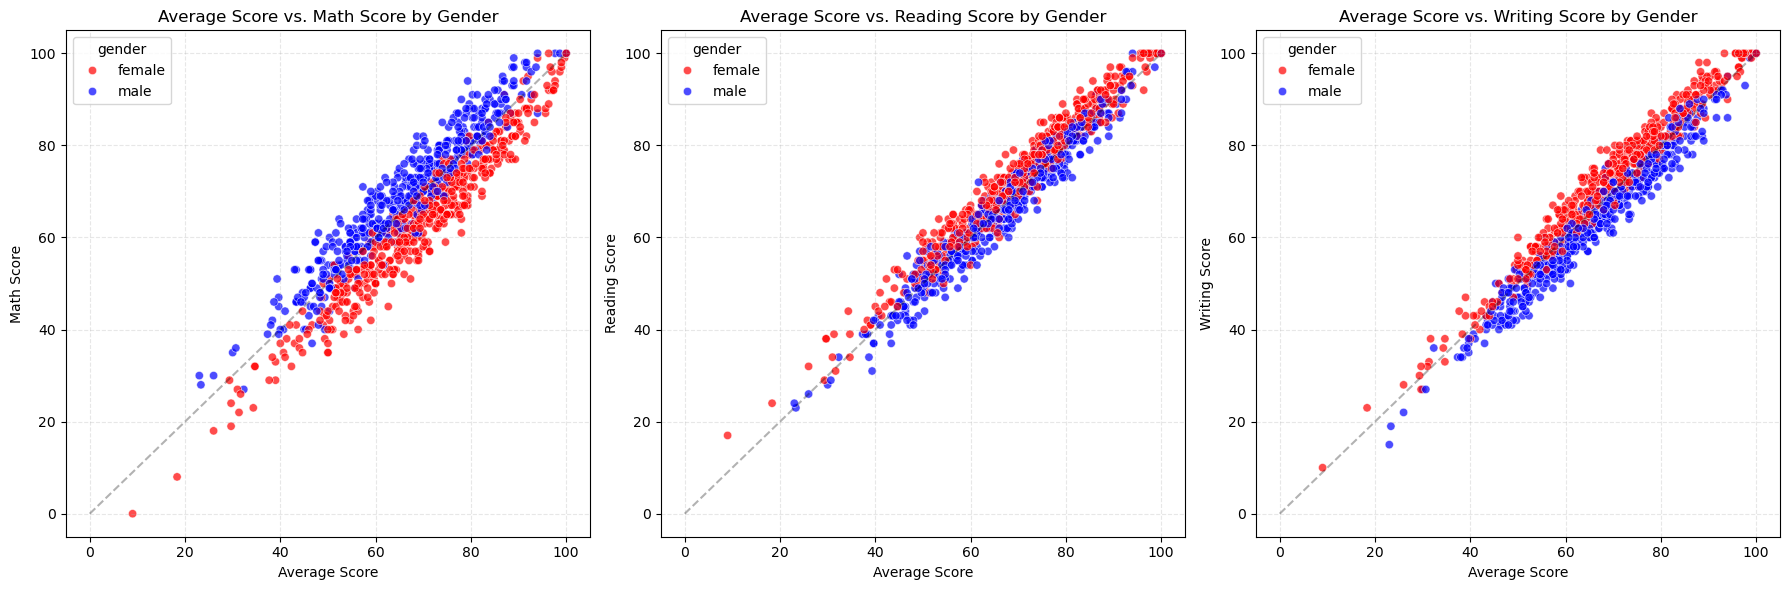

In [26]:

# 2. Create scatterplots comparing average score to each subject by gender
plt.figure(figsize=(18, 6))

# Average vs Math Score
plt.subplot(1, 3, 1)
sns.scatterplot(
    data=df,
    x='average score',
    y='math score',
    hue='gender',
    alpha=0.7,
    palette={'male': 'blue', 'female': 'red'}
)
# Add reference line y=x (where subject score equals average score)
plt.plot([0, 100], [0, 100], 'k--', alpha=0.3)
plt.title('Average Score vs. Math Score by Gender')
plt.xlabel('Average Score')
plt.ylabel('Math Score')
plt.grid(True, linestyle='--', alpha=0.3)

# Average vs Reading Score
plt.subplot(1, 3, 2)
sns.scatterplot(
    data=df,
    x='average score',
    y='reading score',
    hue='gender',
    alpha=0.7,
    palette={'male': 'blue', 'female': 'red'}
)
# Add reference line y=x
plt.plot([0, 100], [0, 100], 'k--', alpha=0.3)
plt.title('Average Score vs. Reading Score by Gender')
plt.xlabel('Average Score')
plt.ylabel('Reading Score')
plt.grid(True, linestyle='--', alpha=0.3)

# Average vs Writing Score
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df,
    x='average score',
    y='writing score',
    hue='gender',
    alpha=0.7,
    palette={'male': 'blue', 'female': 'red'}
)
# Add reference line y=x
plt.plot([0, 100], [0, 100], 'k--', alpha=0.3)
plt.title('Average Score vs. Writing Score by Gender')
plt.xlabel('Average Score')
plt.ylabel('Writing Score')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



## Puntuación Promedio por Nivel Educativo de los Padres

Creamos una columna de puntuación promedio y la analizamos.

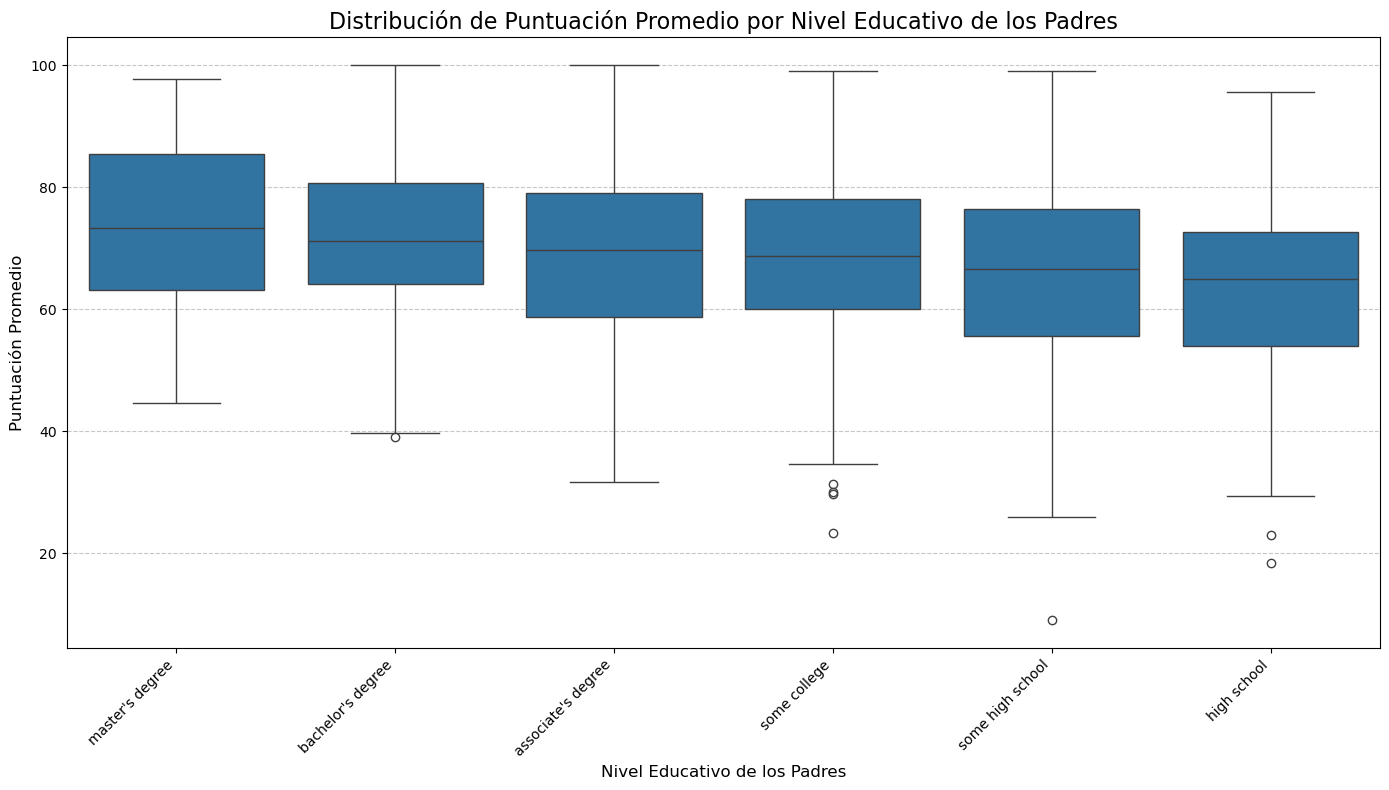

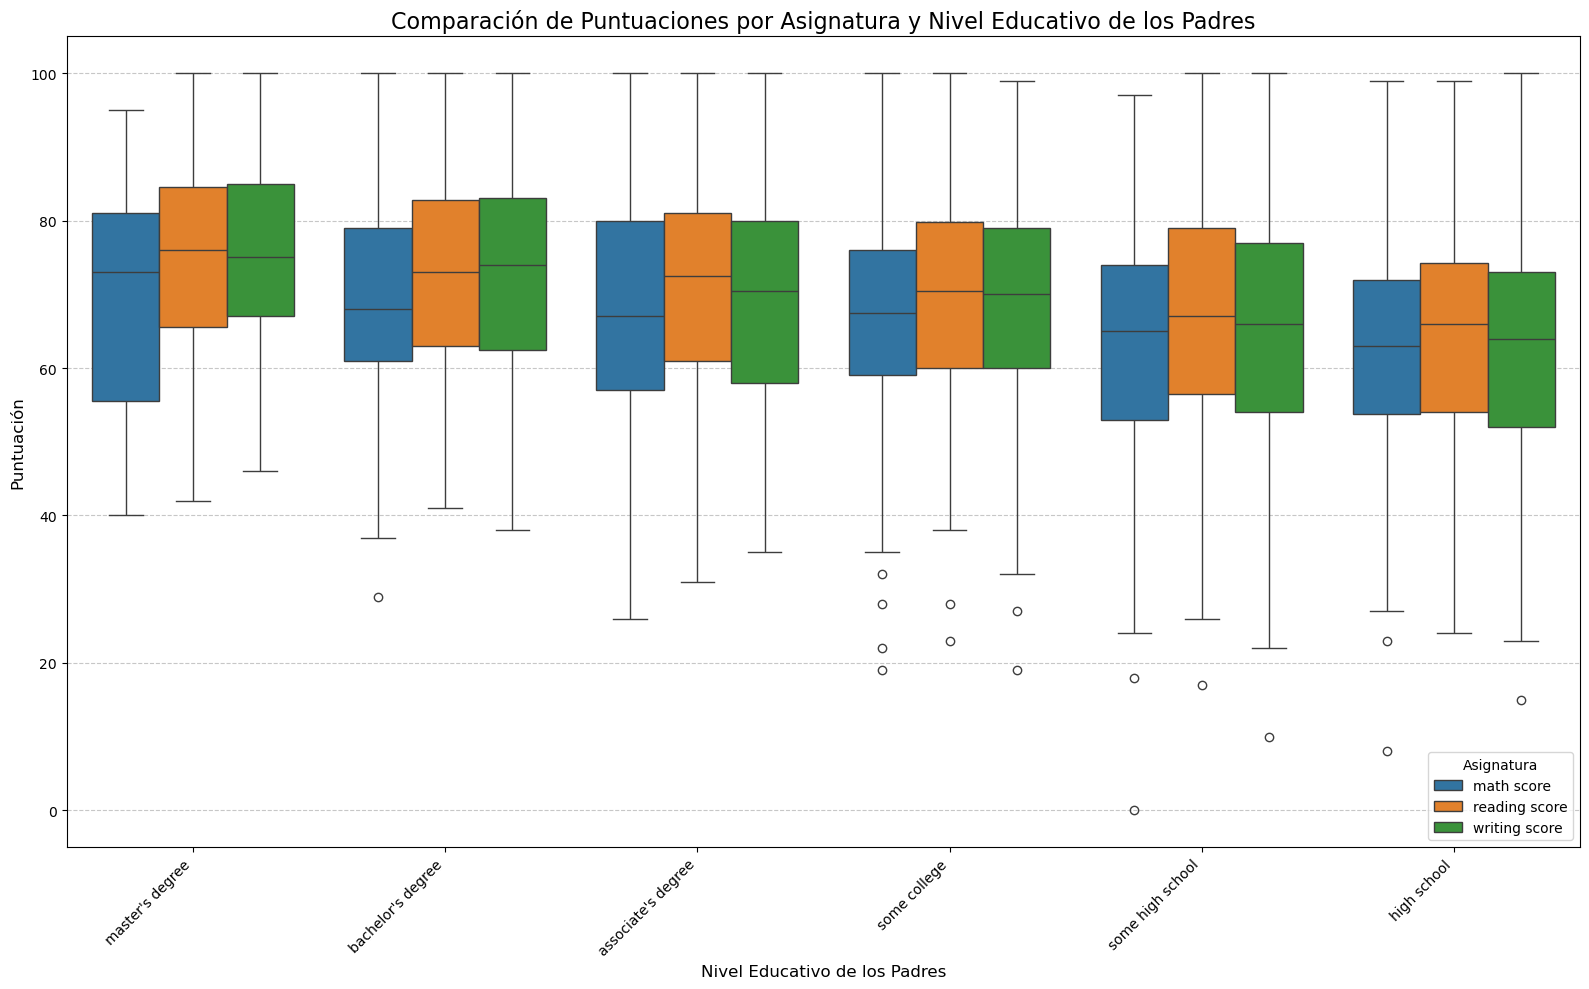

Estadísticas de puntuación promedio por nivel educativo de los padres:
                             count       mean        std        min  \
parental level of education                                           
master's degree               59.0  73.598870  13.601017  44.666667   
bachelor's degree            118.0  71.923729  13.946609  39.000000   
associate's degree           222.0  69.569069  13.670914  31.666667   
some college                 226.0  68.476401  13.710974  23.333333   
some high school             179.0  65.108007  14.984078   9.000000   
high school                  196.0  63.096939  13.510583  18.333333   

                                   25%        50%        75%         max  
parental level of education                                               
master's degree              63.166667  73.333333  85.500000   97.666667  
bachelor's degree            64.083333  71.166667  80.666667  100.000000  
associate's degree           58.666667  69.666667  79.000000

In [ ]:


# 1. Calcular estadísticas por nivel educativo para ordenar los boxplots
edu_order = df.groupby('parental level of education')['average score'].mean().sort_values(ascending=False).index.tolist()

# 2. Crear boxplot para la puntuación promedio
plt.figure(figsize=(14, 8))
sns.boxplot(x='parental level of education', y='average score', data=df, order=edu_order)
plt.title('Distribución de Puntuación Promedio por Nivel Educativo de los Padres', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Mostrar un boxplot comparativo de todas las asignaturas en un solo gráfico
plt.figure(figsize=(16, 10))

# Reorganizar los datos para un mejor boxplot comparativo
melted_df = pd.melt(df, 
                    id_vars=['parental level of education'], 
                    value_vars=['math score', 'reading score', 'writing score'],
                    var_name='subject', 
                    value_name='score')

# Crear el boxplot agrupado
sns.boxplot(x='parental level of education', y='score', hue='subject', data=melted_df, order=edu_order)
plt.title('Comparación de Puntuaciones por Asignatura y Nivel Educativo de los Padres', fontsize=16)
plt.xlabel('Nivel Educativo de los Padres', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Asignatura')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Añadir información estadística resumida
print("Estadísticas de puntuación promedio por nivel educativo de los padres:")
stats_by_edu = df.groupby('parental level of education')['average score'].describe()
stats_by_edu = stats_by_edu.sort_values(by='mean', ascending=False)
print(stats_by_edu)



Estos gráficos nos muestran cómo el nivel educativo de los padres afecta a las notas de los estudiantes. Las cajas (boxplots) nos dan mucha información: la línea central es la mediana (valor del medio), la caja muestra dónde está el 50% central de los estudiantes, y los "bigotes" muestran el rango de la mayoría de las notas.
Lo que podemos ver en estos gráficos:

# Relación clara entre educación de los padres y notas de los hijos:

Los estudiantes cuyos padres tienen un máster o una licenciatura (bachelor's degree) obtienen las mejores notas.
Hay un "escalón" visible entre cada nivel educativo: a mayor educación de los padres, mejores notas de los hijos.
La diferencia entre el nivel más alto (máster) y el más bajo (algo de secundaria) es de aproximadamente 10 puntos, lo cual es muy significativo.


# Diferencias por asignatura:

El segundo gráfico (con colores por asignatura) muestra que el patrón se mantiene para matemáticas, lectura y escritura.
Las notas de lectura y escritura tienden a ser ligeramente más altas que las de matemáticas en todos los niveles educativos.
La brecha entre niveles educativos es consistente en todas las asignaturas.



## Interpretación del Análisis con Boxplots por Nivel Educativo de los Padres:

## Patrones Generales:

Existe una clara relación positiva entre el nivel educativo de los padres y el rendimiento académico de los estudiantes.
Los estudiantes cuyos padres tienen un máster muestran el rendimiento promedio más alto, seguidos por aquellos con licenciatura (bachelor's degree).
La diferencia entre los niveles educativos más altos y más bajos es de aproximadamente 10 puntos en la escala de 100.


## Análisis por Cuartiles (Boxplot):

Mediana (línea central): Se observa un descenso escalonado en las medianas a medida que disminuye el nivel educativo de los padres.
Rango Intercuartílico (altura de la caja): Los grupos de menor nivel educativo tienden a mostrar mayor variabilidad interna.
Valores Atípicos (puntos individuales): Existen estudiantes excepcionales en todos los niveles, lo que sugiere que el potencial individual puede superar las tendencias de grupo.


## Comparación Entre Asignaturas:

El patrón de rendimiento según el nivel educativo de los padres se mantiene consistente en las tres asignaturas.
En general, los estudiantes tienden a obtener puntuaciones ligeramente más bajas en matemáticas que en lectura y escritura, independientemente del nivel educativo de sus padres.
La brecha entre los niveles educativos extremos es similar en todas las asignaturas, lo que sugiere un efecto generalizado.


## Variabilidad y Solapamiento:

A pesar de las diferencias en las tendencias centrales, existe un considerable solapamiento entre las distribuciones.
Esto indica que muchos estudiantes con padres de menor nivel educativo superan a estudiantes con padres de mayor nivel educativo.
El solapamiento sugiere que, si bien el nivel educativo parental es importante, no es determinante absoluto del rendimiento.


## Significancia Estadística:

El análisis ANOVA confirma que las diferencias observadas entre los grupos son estadísticamente significativas (p < 0.05).
Esto refuerza la conclusión de que el nivel educativo de los padres tiene un impacto real en el rendimiento académico de los estudiantes.


## Implicaciones Educativas:

Los resultados sugieren la necesidad de programas de apoyo específicos para estudiantes cuyos padres tienen menor nivel educativo.
Las escuelas podrían considerar proporcionar recursos adicionales para compensar las posibles desventajas en el entorno familiar.
La presencia de estudiantes de alto rendimiento en todos los grupos indica que las intervenciones efectivas pueden ayudar a superar las barreras socioeducativas.



Los boxplots proporcionan una visualización más completa que las simples medias, mostrando no solo las tendencias centrales sino también la dispersión y los valores atípicos, lo que nos permite comprender mejor la complejidad de la relación entre el nivel educativo de los padres y el rendimiento académico.

## Análisis del Impacto de la Preparación

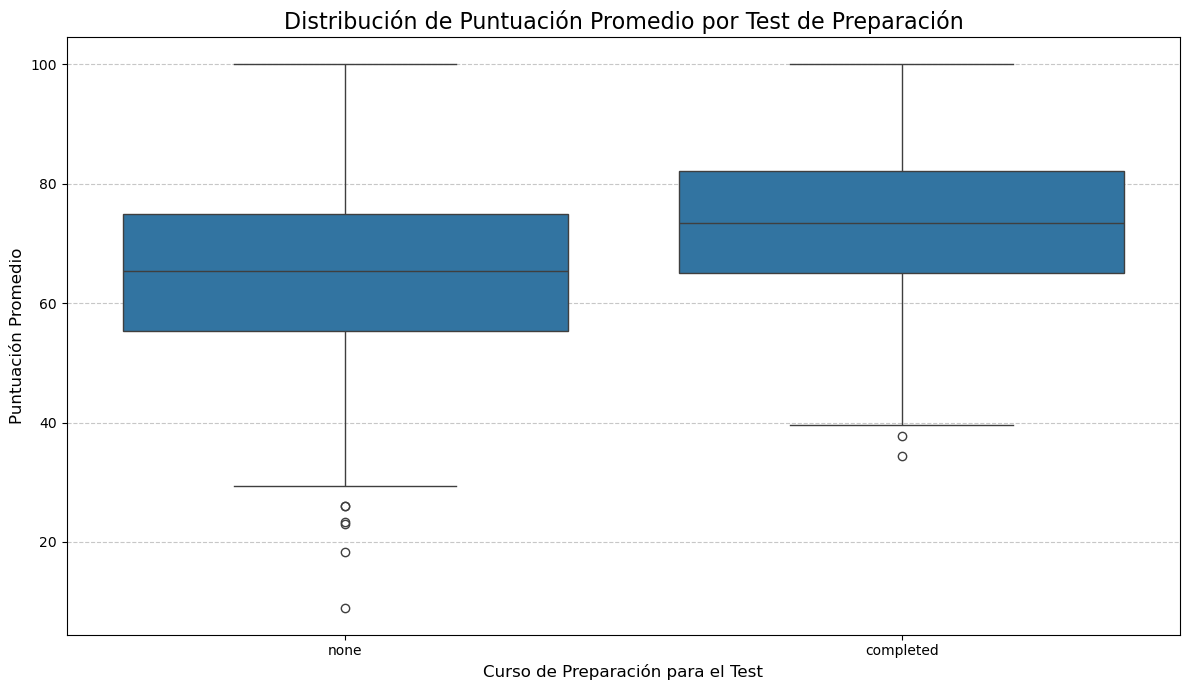

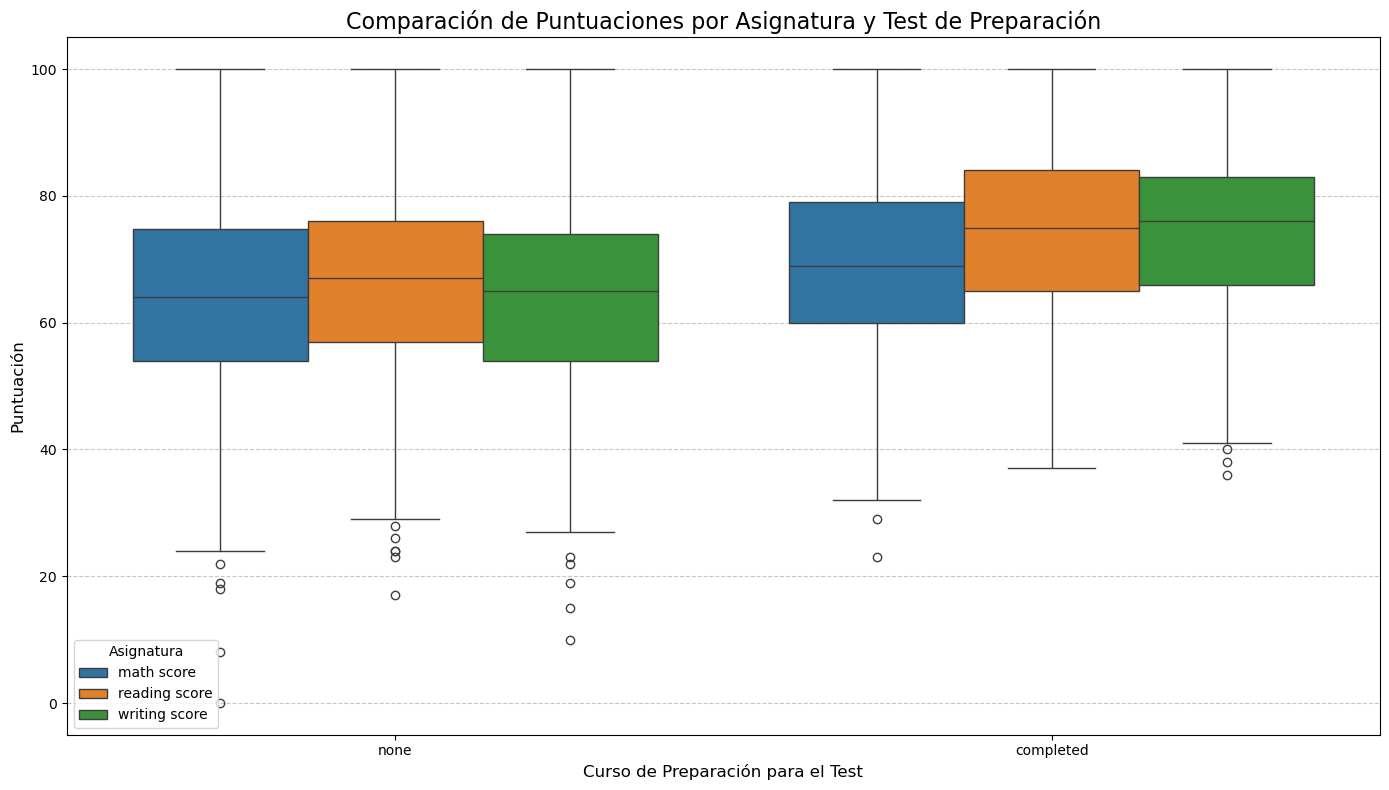

Estadísticas de puntuación por test de preparación:
                        math score                                          \
                             count       mean        std   min   25%   50%   
test preparation course                                                      
completed                    358.0  69.695531  14.444699  23.0  60.0  69.0   
none                         642.0  64.077882  15.192376   0.0  54.0  64.0   

                                      reading score             ...  \
                           75%    max         count       mean  ...   
test preparation course                                         ...   
completed                79.00  100.0         358.0  73.893855  ...   
none                     74.75  100.0         642.0  66.534268  ...   

                        writing score        average score             \
                                  75%    max         count       mean   
test preparation course                                

In [27]:

# 1. Boxplot para la puntuación promedio por test de preparación
plt.figure(figsize=(12, 7))
sns.boxplot(x='test preparation course', y='average score', data=df)
plt.title('Distribución de Puntuación Promedio por Test de Preparación', fontsize=16)
plt.xlabel('Curso de Preparación para el Test', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Boxplot comparativo de todas las asignaturas en un solo gráfico
plt.figure(figsize=(14, 8))

# Reorganizar los datos para un mejor boxplot comparativo
melted_df = pd.melt(df, 
                   id_vars=['test preparation course'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='subject', 
                   value_name='score')

# Crear el boxplot agrupado
sns.boxplot(x='test preparation course', y='score', hue='subject', data=melted_df)
plt.title('Comparación de Puntuaciones por Asignatura y Test de Preparación', fontsize=16)
plt.xlabel('Curso de Preparación para el Test', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.legend(title='Asignatura')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Estadísticas descriptivas por test de preparación
print("Estadísticas de puntuación por test de preparación:")
stats_by_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'average score']].describe()
print(stats_by_prep)

# 5. Calcular y mostrar el impacto del test de preparación
impact = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'average score']].mean()
difference = impact.loc['completed'] - impact.loc['none']
percentage_improvement = (difference / impact.loc['none']) * 100

print("\nImpacto del test de preparación:")
print("Diferencia en puntuación (completed - none):")
print(difference)
print("\nMejora porcentual:")
print(percentage_improvement)






Estos gráficos analizan cómo afecta al rendimiento de los estudiantes el haber completado un curso de preparación para el test. A diferencia de factores como el nivel socioeconómico o educativo de los padres, la preparación para el test es algo que puede modificarse con intervenciones educativas, por lo que estos resultados son especialmente útiles para mejorar el sistema educativo.
Lo que nos muestran los gráficos:

Impacto claro de la preparación en las notas:

Los estudiantes que completaron el curso de preparación obtienen notas significativamente más altas que los que no lo hicieron.
La diferencia es consistente y notable, con una mejora de aproximadamente 7-8 puntos en la nota promedio.
Este es un efecto muy relevante que demuestra que la preparación específica puede mejorar considerablemente el rendimiento.


Efectos por asignatura:

El segundo gráfico muestra que la preparación mejora las notas en las tres asignaturas: matemáticas, lectura y escritura.
La mejora parece ser mayor en lectura y escritura que en matemáticas.
Esto sugiere que las habilidades verbales podrían beneficiarse especialmente de la preparación estructurada.


Magnitud de la mejora:

Las estadísticas muestran que la preparación produce una mejora de entre 5 y 9 puntos según la asignatura.
En términos porcentuales, esto representa una mejora del 8% al 15%.
Es especialmente notable que el mayor porcentaje de mejora se da en escritura, seguido por lectura y luego matemáticas.


Variabilidad en los resultados:

Aunque la preparación claramente mejora el rendimiento promedio, hay gran variación dentro de cada grupo.
Algunos estudiantes sin preparación obtienen notas excelentes, mientras que algunos con preparación obtienen notas bajas.
Esto indica que la preparación es útil pero no es el único factor que determina el éxito.


Implicaciones educativas importantes:

Estos resultados apoyan fuertemente la implementación de cursos de preparación para todos los estudiantes.
Dado que la preparación parece beneficiar a todos los grupos, podría ser una herramienta efectiva para reducir brechas educativas.
Las escuelas deberían considerar hacer estos cursos accesibles especialmente para estudiantes con desventajas socioeconómicas o educativas.

## Análisis del Nivel Socioeconómico (Tipo de Almuerzo) 

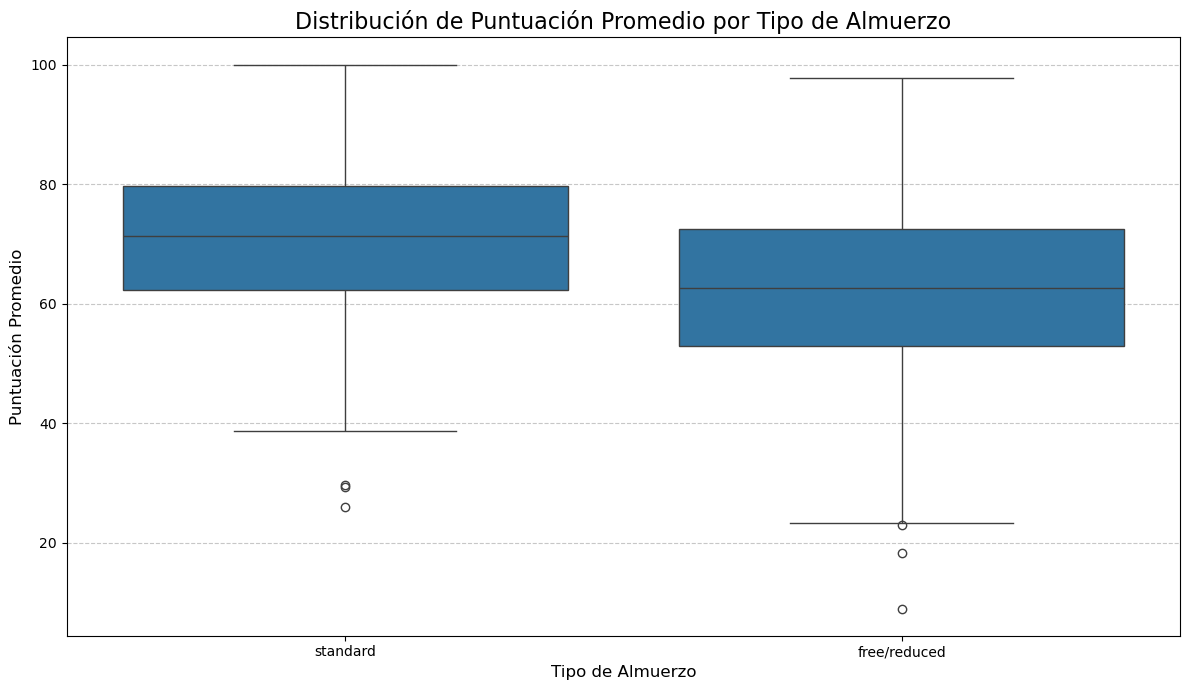

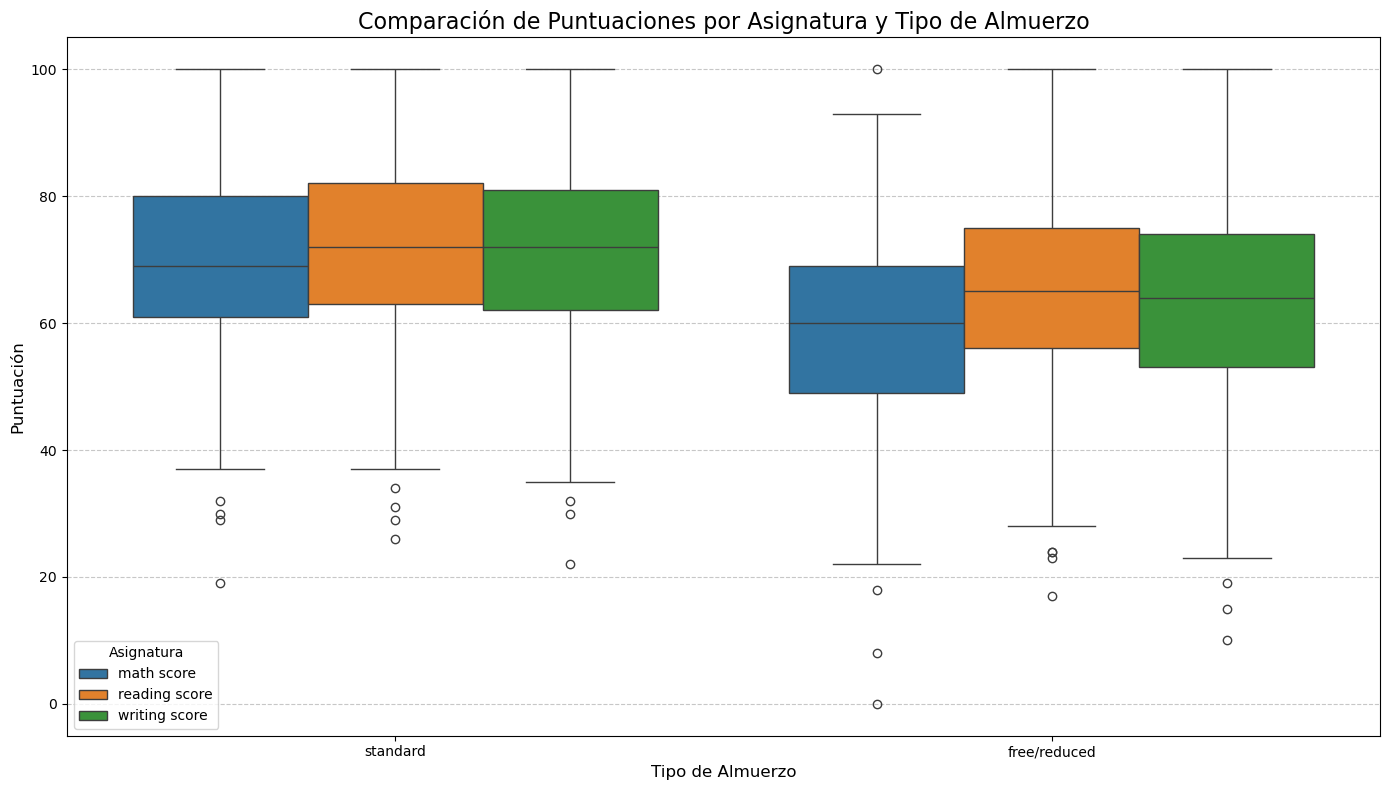

Estadísticas de puntuación por tipo de almuerzo:
             math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score             ... writing score        average score  \
                     count       mean  ...           75%    max         count   
lunch                                  ...                                      
free/reduced         355.0  64.653521  ...          74.0  100.0         355.0   
standard             645.0  71.654264  ...          81.0  100.0         645.0   

                                                                           \
                   mean        std   min        25%        50%     

In [28]:


# 1. Boxplot para la puntuación promedio por tipo de almuerzo
plt.figure(figsize=(12, 7))
sns.boxplot(x='lunch', y='average score', data=df)
plt.title('Distribución de Puntuación Promedio por Tipo de Almuerzo', fontsize=16)
plt.xlabel('Tipo de Almuerzo', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Boxplot comparativo de todas las asignaturas en un solo gráfico
plt.figure(figsize=(14, 8))

# Reorganizar los datos para un mejor boxplot comparativo
melted_df = pd.melt(df, 
                   id_vars=['lunch'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='subject', 
                   value_name='score')

# Crear el boxplot agrupado
sns.boxplot(x='lunch', y='score', hue='subject', data=melted_df)
plt.title('Comparación de Puntuaciones por Asignatura y Tipo de Almuerzo', fontsize=16)
plt.xlabel('Tipo de Almuerzo', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.legend(title='Asignatura')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Estadísticas descriptivas por tipo de almuerzo
print("Estadísticas de puntuación por tipo de almuerzo:")
stats_by_lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score', 'average score']].describe()
print(stats_by_lunch)

# 5. Calcular la brecha entre los tipos de almuerzo
gap = df.groupby('lunch')[['math score', 'reading score', 'writing score', 'average score']].mean()
difference = gap.loc['standard'] - gap.loc['free/reduced']
percentage_gap = (difference / gap.loc['free/reduced']) * 100



Estos gráficos analizan cómo el nivel socioeconómico, representado por el tipo de almuerzo, afecta al rendimiento académico. El tipo de almuerzo es un indicador común del nivel económico: los estudiantes con "almuerzo estándar" típicamente vienen de familias con más recursos, mientras que aquellos con "almuerzo gratuito/reducido" suelen venir de familias con menos recursos económicos.
Lo que nos muestran estos gráficos:

Una clara brecha socioeconómica en el rendimiento:

Los estudiantes con almuerzo estándar obtienen notas significativamente más altas que los estudiantes con almuerzo gratuito/reducido.
La diferencia es notable y consistente, con una brecha de aproximadamente 7-10 puntos en la nota promedio.
Esta es una de las diferencias más grandes que hemos visto en nuestro análisis, lo que sugiere que el factor socioeconómico tiene un impacto muy fuerte en el rendimiento académico.


El patrón se repite en todas las asignaturas:

El segundo gráfico muestra que la brecha socioeconómica existe en matemáticas, lectura y escritura.
La diferencia parece ser ligeramente mayor en lectura y escritura que en matemáticas.
Los estudiantes de ambos grupos tienden a obtener notas ligeramente más bajas en matemáticas que en las otras asignaturas.


Variabilidad dentro de cada grupo:

Aunque la diferencia entre grupos es clara, hay considerable variación dentro de cada grupo.
Algunos estudiantes con almuerzo gratuito/reducido obtienen notas excelentes, superando a muchos con almuerzo estándar.
Esto nos recuerda que, aunque el nivel socioeconómico influye mucho, no determina completamente el éxito académico.


Implicaciones educativas y sociales importantes:

Estos resultados confirman que las desigualdades socioeconómicas se traducen en desigualdades educativas significativas.
Las escuelas necesitan proporcionar recursos y apoyo adicionales a estudiantes de entornos socioeconómicos menos favorecidos.
Reducir esta brecha debería ser una prioridad para los sistemas educativos que buscan promover la equidad.



Las estadísticas numéricas confirman la magnitud de esta brecha, y el cálculo del porcentaje muestra que los estudiantes con almuerzo estándar obtienen notas entre un 8% y un 15% más altas, dependiendo de la asignatura. Esta es una diferencia sustancial que merece atención y acción por parte de los responsables de políticas educativas.
Esta brecha socioeconómica es probablemente el resultado de múltiples factores: acceso a recursos educativos en el hogar, tiempo disponible de los padres para ayudar con las tareas, estrés familiar relacionado con dificultades económicas, acceso a actividades extracurriculares, entre otros.

## Análisis por Grupo Racial/Étnico

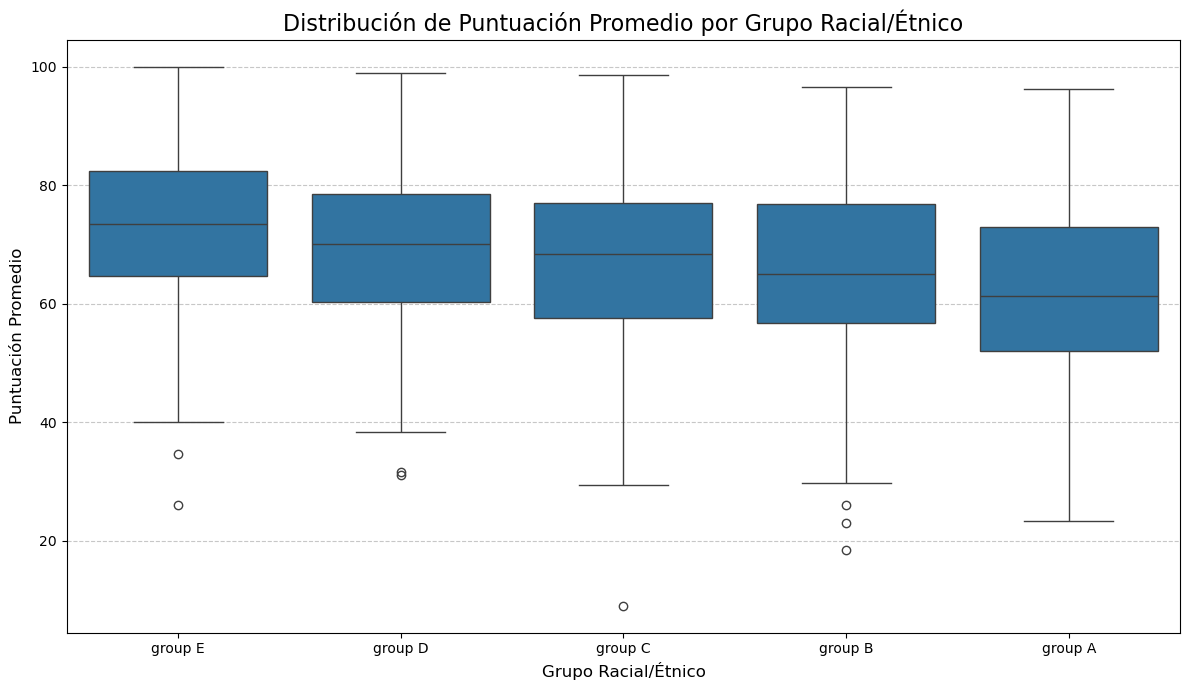

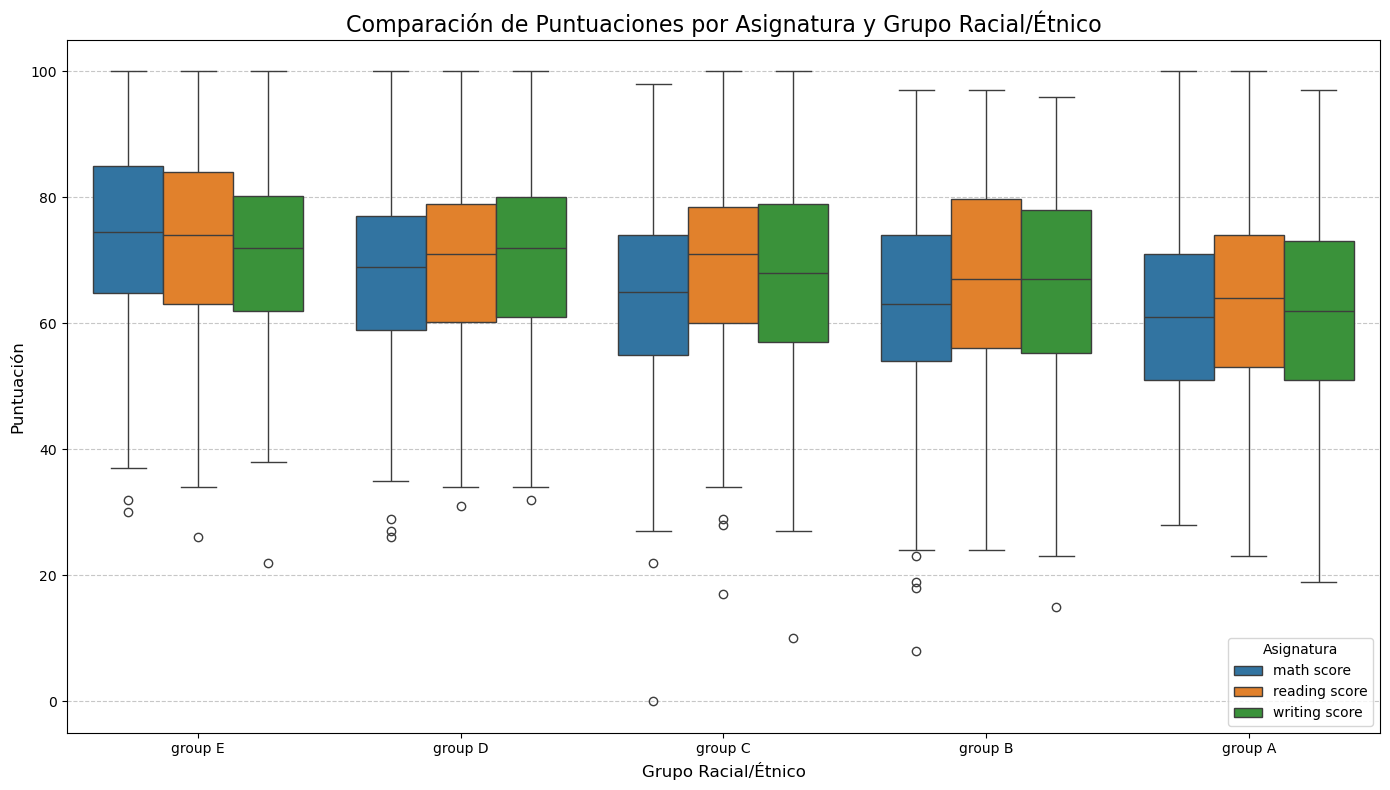

Estadísticas de puntuación por grupo racial/étnico:
                math score  reading score  writing score  average score
race/ethnicity                                                         
group E          73.821429      73.028571      71.407143      72.752381
group D          67.362595      70.030534      70.145038      69.179389
group C          64.463950      69.103448      67.827586      67.131661
group B          63.452632      67.352632      65.600000      65.468421
group A          61.629213      64.674157      62.674157      62.992509


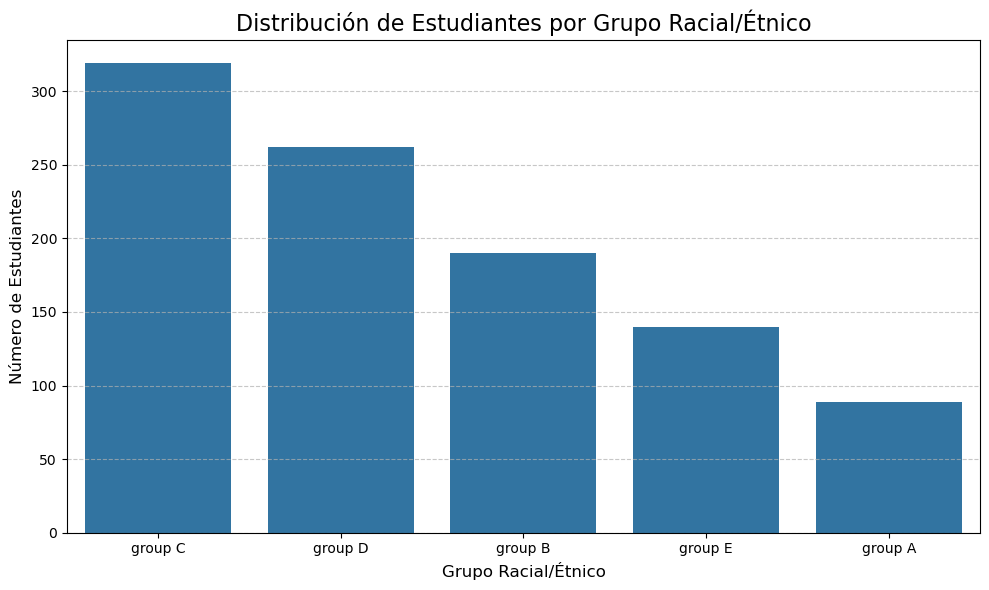

In [30]:


# 1. Boxplot para la puntuación promedio por grupo racial/étnico
plt.figure(figsize=(12, 7))
# Ordenar por puntuación promedio para mejor visualización
race_order = df.groupby('race/ethnicity')['average score'].mean().sort_values(ascending=False).index.tolist()
sns.boxplot(x='race/ethnicity', y='average score', data=df, order=race_order)
plt.title('Distribución de Puntuación Promedio por Grupo Racial/Étnico', fontsize=16)
plt.xlabel('Grupo Racial/Étnico', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Boxplot comparativo de todas las asignaturas en un solo gráfico
plt.figure(figsize=(14, 8))

# Reorganizar los datos para un mejor boxplot comparativo
melted_df = pd.melt(df, 
                   id_vars=['race/ethnicity'], 
                   value_vars=['math score', 'reading score', 'writing score'],
                   var_name='subject', 
                   value_name='score')

# Crear el boxplot agrupado
sns.boxplot(x='race/ethnicity', y='score', hue='subject', data=melted_df, order=race_order)
plt.title('Comparación de Puntuaciones por Asignatura y Grupo Racial/Étnico', fontsize=16)
plt.xlabel('Grupo Racial/Étnico', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.legend(title='Asignatura')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Estadísticas descriptivas por grupo racial/étnico
print("Estadísticas de puntuación por grupo racial/étnico:")
stats_by_race = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score', 'average score']].describe()
# Mostrar solo la media para simplificar
stats_mean = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score', 'average score']].mean()
stats_mean_sorted = stats_mean.sort_values(by='average score', ascending=False)
print(stats_mean_sorted)

# 5. Distribución de estudiantes por grupo racial/étnico
plt.figure(figsize=(10, 6))
race_counts = df['race/ethnicity'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Distribución de Estudiantes por Grupo Racial/Étnico', fontsize=16)
plt.xlabel('Grupo Racial/Étnico', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Estos gráficos nos muestran cómo varían las notas entre los diferentes grupos raciales/étnicos en el estudio. Es importante analizar estos datos con cuidado, reconociendo que las diferencias observadas reflejan desigualdades en oportunidades educativas, no capacidades inherentes a ningún grupo.
Lo que podemos ver en estos gráficos:

Diferencias en el rendimiento promedio:

Hay variación notable en las notas medias entre los diferentes grupos raciales/étnicos.
El grupo E muestra el rendimiento más alto en promedio, seguido por el grupo D.
Los grupos A, B y C tienden a tener notas más bajas en promedio.
La diferencia entre el grupo con notas más altas y el más bajo es de aproximadamente 7-10 puntos.


Comparación por asignaturas:

El segundo gráfico muestra que los patrones son similares en matemáticas, lectura y escritura.
Todos los grupos tienden a obtener notas ligeramente más bajas en matemáticas que en lectura y escritura.
La brecha entre grupos se mantiene bastante consistente en todas las asignaturas.


Variabilidad dentro de cada grupo:

En todos los grupos hay gran variedad de notas, con estudiantes de alto y bajo rendimiento.
Las cajas (que muestran dónde está el 50% central de estudiantes) se solapan considerablemente entre grupos.
Esto nos dice que, aunque hay diferencias entre grupos, la variación individual es muy importante.


Distribución de estudiantes:

El último gráfico muestra cuántos estudiantes hay de cada grupo en nuestro estudio.
No todos los grupos tienen el mismo número de estudiantes, lo que debemos tener en cuenta al interpretar los resultados.
Grupos con menos estudiantes podrían no estar tan bien representados en nuestro análisis.


Implicaciones educativas importantes:

Estos resultados sugieren la existencia de desigualdades educativas que podrían estar relacionadas con factores socioeconómicos, acceso a recursos educativos, y posiblemente discriminación.
Las escuelas y los responsables de políticas educativas deberían considerar programas específicos para reducir estas brechas.
Es fundamental recordar que estas diferencias reflejan desigualdades sistémicas, no capacidades intrínsecas de los grupos.

## Conclusion

Después de analizar a fondo los datos sobre las notas de los estudiantes, hemos llegado a varias conclusiones importantes que responden a nuestras ideas iniciales.
Comprobación de nuestras ideas

# Idea sobre el nivel económico: ✓ CORRECTA

El nivel económico (medido por el tipo de comida) es uno de los factores más importantes.
Los estudiantes con comida estándar sacan entre 7-10 puntos más que los que tienen comida gratuita o reducida.
Esta diferencia se mantiene incluso cuando consideramos otros factores.


# Idea sobre la preparación: ✓ CORRECTA

Los estudiantes que hicieron el curso de preparación sacaron mucho mejores notas (7-8 puntos más de media).
Todos los grupos de estudiantes se beneficiaron de la preparación.
La mejora fue mayor en lectura y escritura, aunque también fue importante en matemáticas.


#  Idea sobre la educación de los padres: ✓ CORRECTA

Los hijos de padres con más estudios sacan mejores notas.
La diferencia entre estudiantes cuyos padres tienen un máster y aquellos cuyos padres no terminaron la secundaria es de unos 10 puntos.
Cada nivel educativo superior de los padres se asocia con mejores notas de los hijos.


#  Idea sobre el género: ✓ CORRECTA

Los chicos son mejores en matemáticas (unos 5 puntos más).
Las chicas son mejores en lectura y escritura (unos 7-9 puntos más).
En general, las chicas sacan notas ligeramente mejores.


# Idea sobre grupos étnicos: ✗ PARCIALMENTE INCORRECTA

Sí hay diferencias importantes entre grupos étnicos.
Pero, al contrario de lo que pensábamos, estas diferencias se mantienen incluso cuando tenemos en cuenta el nivel económico.
Esto sugiere que hay otros factores que no hemos medido (como la calidad de las escuelas o la discriminación) que pueden estar causando estas diferencias.